# Table of contents
[1 - Introduction](https://github.com/ildeniz/ML-2022-001-Glass_classification/blob/main/ML-2022-001-Glass_classification#chapter1)\
[2 - Loading libraries and data exploration](https://github.com/ildeniz/ML-2022-001-Glass_classification/blob/main/ML-2022-001-Glass_classification#chapter2)\
[3 - Models](https://github.com/ildeniz/ML-2022-001-Glass_classification/blob/main/ML-2022-001-Glass_classification#chapter3)\
[4 - Results](#3_-_)

# 0 - Abstract

# 1 - Introduction <a class="anchor" id="chapter1"></a>

The purpose of this study is to define the type of a glass depending on the given features which are also ingredients in each glass sample and refractive index (RI). There are seven type of glasses but type-4 is omitted from the data set hence there are six type of glass in the data set.

The motivation behind the glass classification is given by the contributor as;
>The study of classification of types of glass was motivated by
criminological investigation. At the scene of the crime, the glass left
can be used as evidence…if it is correctly identified!

The data set used in this work is obtained from;
- https://archive.ics.uci.edu/ml/datasets/Glass+Identification
- https://www.kaggle.com/datasets/uciml/glass

Columns names and also the ingredients are:
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass: (class attribute)
    - 1 building*windows*float*processed*
    - 2 building*windows*non*float*processed
    - 3 vehicle*windows*float*processed*
    - ~~4 vehicle*windows*non*float*processed~~ (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

Data exploration of this dataset reveals two important characteristics :
1) The variables are highly corelated with each other including the response variables:
So which kind of ML algorithm is most suitable for this dataset Random Forest , KNN or other? Also since dataset is too small is there any chance of applying PCA or it should be completely avoided?

2) Highly Skewed Data:
Is scaling sufficient or are there any other techniques which should be applied to normalize data? Like BOX-COX Power transformation?

# 2 - Loading libraries and data exploration <a class="anchor" id="chapter2"></a>

Loading libraries and packages to be used

In [21]:
import pandas as pd # To read the data set and data preprocessing.
import numpy as np # 
import matplotlib.pyplot as plt
import seaborn as sns #
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [29]:
glass = pd.read_csv('Data/glass.csv') # importing the dataset
glass.shape
print('This data set is consistent of',glass.shape[0], 'observations and', glass.shape[1], 'columns.')

This data set is consistent of 214 observations and 10 columns.


With only 214 observations, one can say that this data set is too small to acquire good results so one should apply resampling methods such as `K-fold Cross-validation` or `Bootstrap`

In [23]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#df.tail()

Selec the features and target

In [39]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [40]:
# To create features from the original dataset

# #features = df.columns[:-1].tolist()
# target = 'Type'

# features = glass.drop([target], axis=1).columns.tolist()
# features

In [26]:
glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [38]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
glass.nunique() #To evaluate the cardinality of non-numeric columns

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [31]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

# 1 - EDA

One should inspect if there is any categorical variables.

In [32]:
# Get list of categorical variables
s = (glass.dtypes == 'object')
object_cols = list(s[s].index)

if len(object_cols) == 0:
    print('The data frame does not include categorical variables.')
else:
    print("Categorical variables are:", object_cols)


The data frame does not include categorical variables.


## Data preprocessing (missing values, scaling. etc)

### Data Celaning

#### Missing values

Is there any missing values?

In [42]:
missing_val_count_by_column = (df.isnull().sum()).sort_values(ascending=False) # A series of features with missing data

if missing_val_count_by_column[missing_val_count_by_column > 0].shape[0] > 1:
    total_num_of_cells = np.product(df.shape)
    total_num_of_missing = missing_val_count_by_column.sum

    # percent of data that is missing
    percent_missing = (total_num_of_missing/total_num_of_cells) * 100
    print('%.2f %% of data is missing.\n' % percent_missing)
    print(missing_val_count_by_column[missing_val_count_by_column > 0])
else:
    print('There are no missing values in this dataset.')

There are no missing values in this dataset.


What is the relationship between the variables?

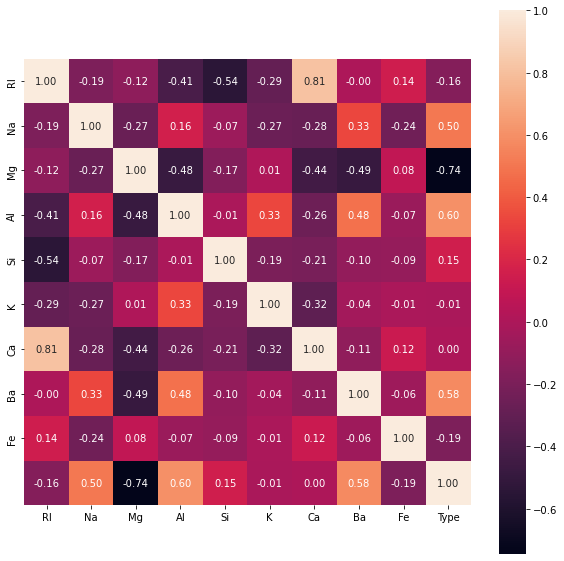

In [33]:
correlation = glass.corr()

#sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 10},
           xticklabels= glass.columns, yticklabels= features) #, alpha = 0.7, cmap= 'coolwarm')
plt.show()

The heat map above shows that there is a strong relationship between RI and Ca. This ...(gives a hint? heads up?)... that it worths to gain some domain information to understand these features' relationship better.

In [ ]:
#help(sns.heatmap)

In [ ]:
#help(sns.pairplot)
#sns.pairplot(data, vars= ['RI','Ca'])

plt.figure(figsize=(4,4))
sns.pairplot(data)
plt.show()

In [ ]:
sns.relplot(x='RI', y='Ca', hue = 'Type', data = data)

In [ ]:
sns.histplot(data['RI'], bins=10)

In [ ]:
sns.displot(data['RI'], bins=10)

what is the difference b/w `hisplot` and `displot`?

In [ ]:
sns.catplot(y='RI', kind='box', data = data)

In [ ]:
#help(sns.catplot)

In [ ]:
data.RI.count()

In [ ]:
data['RI'].count()

An alternative dependent and independent data selectionReturn item and drop from frameReturn item and drop from frame

In [3]:
X = df.copy() # original data frame is copied to another data frame to avoid data loss
y = X.pop('Type') # Return item and drop from frame. Recorded into target variable as series object

# 3 - Models <a class="anchor" id="chapter3"></a>